#  _<center> Life Expectancy and GDP Analysis </center>_

### _ <center> Introduction </center>_

This project will examine whether a relationship exists between the GDP of six countries and the life expectancy of their populations.

The goals are to prepare data, EDA with ploting, and share findings and study the results. 

**Data Source:** 

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


### Importing requeired libraries .

In [2]:
import csv 
import pandas as pd
import seaborn as sns
import numpy as np 
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
%matplotlib inline

### Load data

Given a csv file `all_data.csv`, the dataset is loaded to a Pandas Dataframe , then the dataframe head will be printed to give an inspection about the dataset 

In [3]:
# read the dataset 
df = pd.read_csv('all_data.csv')
df.head()


,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


To get a better understanding of the data , the data shape will be printed. 

In [4]:

print('shape:',df.shape, '\n')


shape: (96, 4) 



now it is noted that the data has 4 columns in total and 96 rows

### Explore The data

To better understand the relationship between GDP and Life expectency, we would need to explore the data and perform some summary statistics and look for any null values (if exsists).

In [5]:
# perform summry statics
print(df.describe(include='all'), '\n')


print(df.info(), '\n\n') # -> 4 ccolumns in total, 96 records(rows) in each column 

# check for null values :
print('\n null values:')
print(df.isnull().sum(), '\n\n') # -> 0 / no null values



         Country         Year  Life expectancy at birth (years)           GDP
count         96    96.000000                         96.000000  9.600000e+01
unique         6          NaN                               NaN           NaN
top     Zimbabwe          NaN                               NaN           NaN
freq          16          NaN                               NaN           NaN
mean         NaN  2007.500000                         72.789583  3.880499e+12
std          NaN     4.633971                         10.672882  5.197561e+12
min          NaN  2000.000000                         44.300000  4.415703e+09
25%          NaN  2003.750000                         74.475000  1.733018e+11
50%          NaN  2007.500000                         76.750000  1.280220e+12
75%          NaN  2011.250000                         78.900000  4.067510e+12
max          NaN  2015.000000                         81.000000  1.810000e+13 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 

The data seems to have zero null values. in the next step we will investigate the number of countries we are comparing and the number of years we are interested in. 

In [6]:

print('num of Countries: ',df['Country'].unique(), '\n')
print('num of years in the data set:' , '\n', df['Year'])

num of Countries:  ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe'] 

num of years in the data set: 
 0     2000
1     2001
2     2002
3     2003
4     2004
      ... 
91    2011
92    2012
93    2013
94    2014
95    2015
Name: Year, Length: 96, dtype: int64


We are comparing the GDP and life expectency of *six* countries around the period from *2000-2015*

#### Cleaning columns

In [7]:
# Changing United States of Amercia to USA 
df['Country'] = df['Country'].replace('United States of America', 'USA',regex=True)
print(df['Country'].unique())

df = df.rename(columns={ 'Life expectancy at birth (years)' : 'LEABY'})

df

['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']


,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


Looking back at the data , some columns names were too long espacially when plotted
- The column `Life expectency at Brith (years)` was changed to --> **LEABY**
- The column `United State of America` has been changed to --> **USA**

## EDA and Plotting 

Distribute visualization can give quite handy insights about the data . Below, the frequency of GDP rates and LEABY would be shown. 

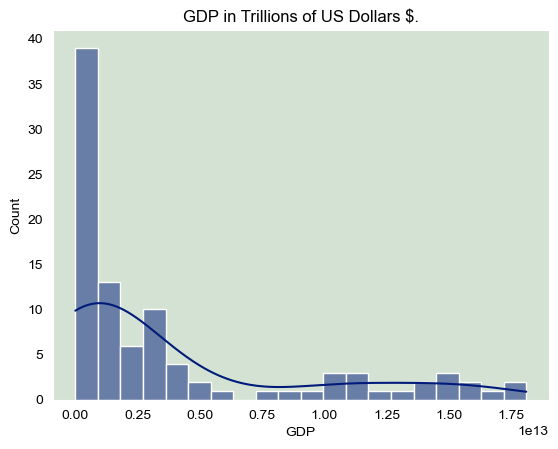

GDP: 
 count    9.600000e+01
mean     3.880499e+12
std      5.197561e+12
min      4.415703e+09
25%      1.733018e+11
50%      1.280220e+12
75%      4.067510e+12
max      1.810000e+13
Name: GDP, dtype: float64 



In [78]:
sns.set_style('darkgrid', {'axes.grid': 'false', 'figure.facecolor': 'white',
                           'axes.facecolor': 'D4E2D4', 'text.color': 'black',
                          'xtick.color': 'black', 'ytick.color': 'black', 'axes.labelcolor': 'black'})
sns.set_palette('dark')             

sns.histplot(x=df.GDP, kde=True, bins=20 , color='#001B79')# palette='RdBu_r
plt.title('GDP in Trillions of US Dollars $.')

plt.show()

print('GDP:','\n', df['GDP'].describe(),'\n')


It appers that the data is left skewed with no outliers as it is shown in the graph. 
This can tell us that there's there are relatively few data points on the left side.

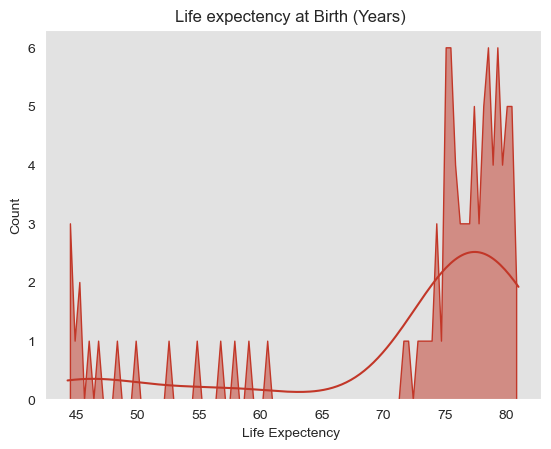

LEABY: count    96.000000
mean     72.789583
std      10.672882
min      44.300000
25%      74.475000
50%      76.750000
75%      78.900000
max      81.000000
Name: LEABY, dtype: float64
60.7


In [63]:
sns.set_style('darkgrid', {'axes.grid': 'false', 'figure.facecolor': 'white' , 'axes.facecolor': '#e2e2e2'})

sns.histplot(x=df.LEABY, kde=True, bins=96, element='poly',palette='RdBu_r',color='#c23728') 
plt.title('Life expectency at Birth (Years) ')
plt.xlabel('Life Expectency ')
plt.show()

print('LEABY:',df['LEABY'].describe())
 
# checking if values [60-70] does exsists in the dataset :
noFreq_lst = [print(num) for num in df['LEABY'] if num > 60 and num < 70.2]


In contrary, when we look at the frequancy of Life expectancy in general we can see that the data is slightly skewed to the right . It is also noticable the absence of the values from the range *61-70* with 0 frequency in the dataset , this has been checked by a simple `for` loop above.

### LEABY vs GDP over the years .

A scatterplot was created to visualize the relationship between LEABY(Life expectancy at birth) and GDP over the years ***[2000 - 2015]***. 
It has been seen that in general, GDP and LEABY has been increasing over the years with some 
inconsistency at some of the periods. 
It also seen that year 2015 was the *peak point* for all the 6 nations's GDP and LEABY .


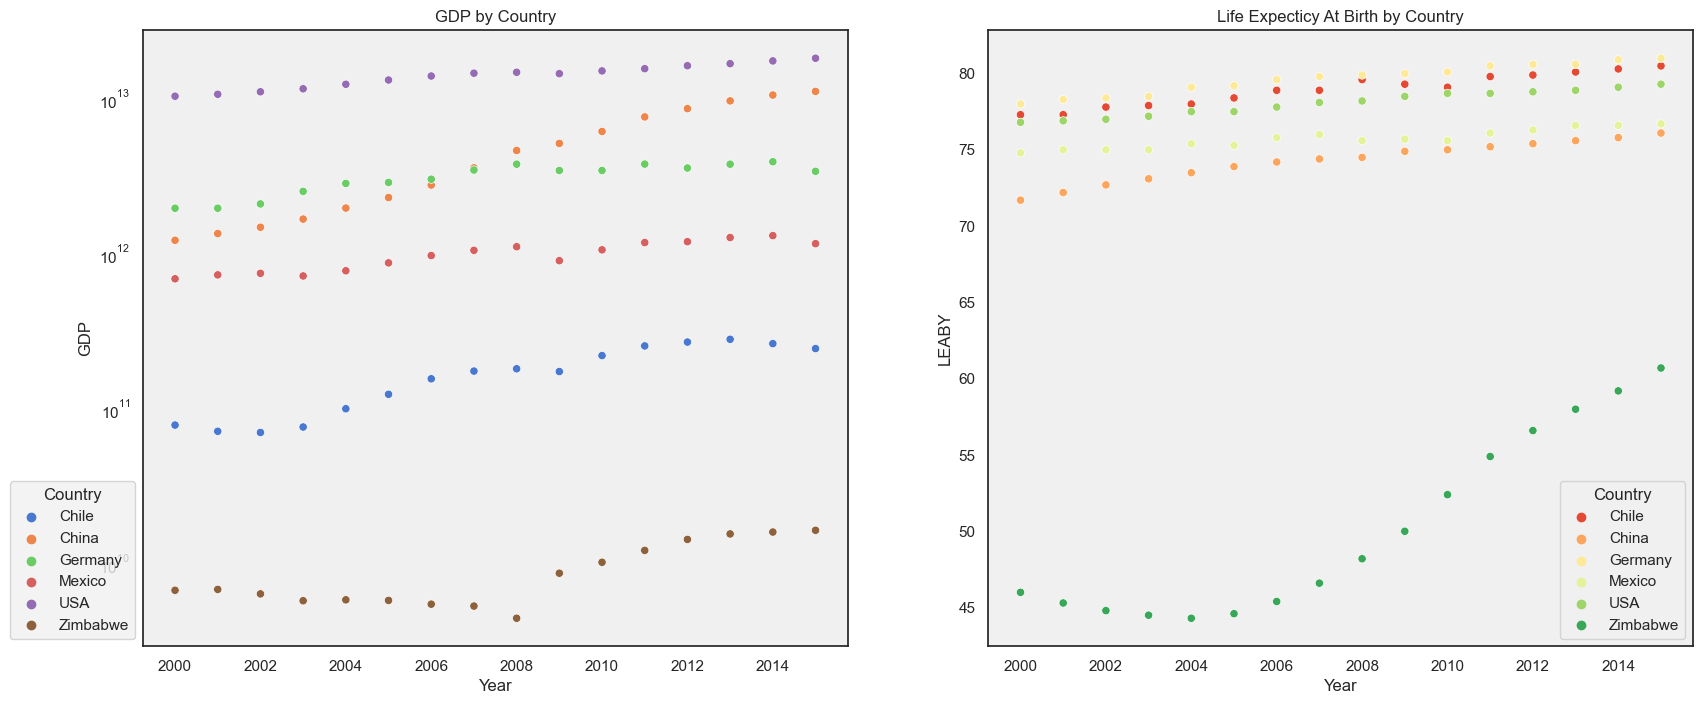

In [130]:
sns.set_style('white', {'axes.facecolor':'F0F0F0'})
# creeate a figure
plt.figure(figsize=(20,8))


# create scatterplot 1
ax = plt.subplot(1,2,1)
sns.scatterplot(x=df.Year, y=df.GDP, color='red',data=df ,hue='Country', palette='muted')
plt.yscale('log')
plt.title('GDP by Country')
sns.move_legend(ax, 'lower right' , bbox_to_anchor=(1, 1))

# create scatterplot 2 
LEABY_palette = sns.color_palette("RdYlGn", n_colors=len(df["Country"].unique()))
plt.subplot(1, 2 , 2)
sns.scatterplot(x=df.Year, y=df.LEABY, data=df, hue='Country', palette=LEABY_palette)
plt.yscale('linear')
plt.title('Life Expecticy At Birth by Country')
sns.move_legend(ax, 'lower right',  bbox_to_anchor=(0,0))#, bbox_to_anchor=(5, 1))
plt.show()
plt.close('all')


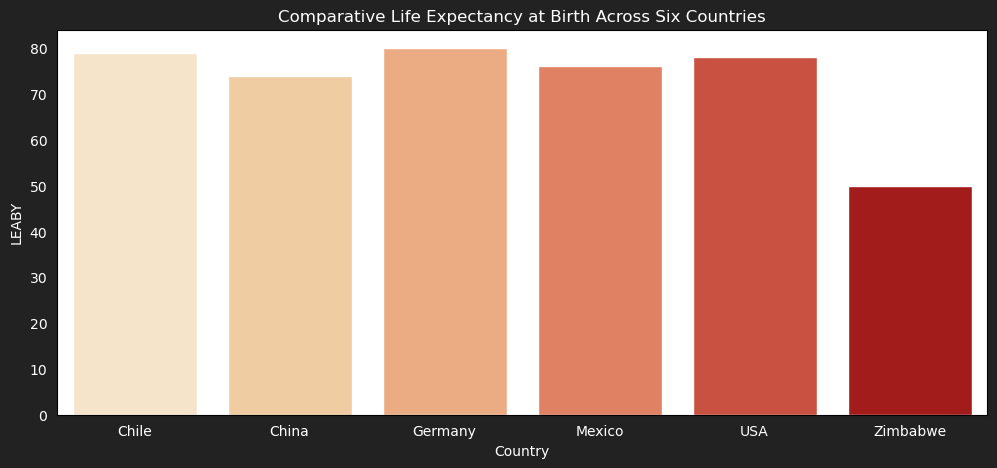

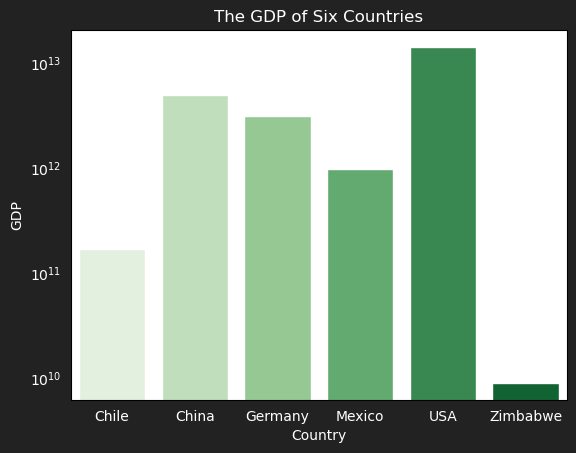

,Country,LEABY,GDP
0,Chile,79.0,1.697888e+11
1,China,74.0,4.957714e+12
2,Germany,80.0,3.094776e+12
3,Mexico,76.0,9.766506e+11
4,USA,78.0,1.407500e+13
5,Zimbabwe,50.0,9.062580e+09


In [88]:
# setting up the style
sns.set_style("darkgrid", {"axes.facecolor": "FFFFFF",
                           'axes.labelcolor': 'white'
                           ,'axes.edgecolor': 'black'
                           ,'figure.facecolor':'#222222'
                          , 'font.sans-serif': 'DejaVu Sans'
                           , 'axes.grid': 'False'
                          , 'text.color': 'white'
                          ,'xtick.color':'white'
                          ,'ytick.color': 'white'})

sns.plotting_context("talk")

# creating a new dataframe containing only the mean values of GDP,LEABY
dfMean = df.drop('Year', axis=1).groupby('Country').mean().round().reset_index(inplace=False)

# create figure
fig = plt.figure(figsize=(12,5))

#create first graph
sns.barplot(data=dfMean, x=dfMean.Country, y=dfMean.LEABY, palette='OrRd')#twilight_shifted_r
plt.title('Comparative Life Expectancy at Birth Across Six Countries')
plt.show()
plt.close('all')

#create second graph
sns.barplot(data=dfMean, x=dfMean.Country, y=dfMean.GDP,fill=True,color='#7284A8', palette='Greens')
plt.title('The GDP of Six Countries')
plt.yscale('log')
plt.show()

#display the new dataframe
dfMean

It was noted that on Average, USA had the highest GDP along with the having the third largest LEABY while Zimbebwe on the other hand is shown to have the least GDP of all the other nations.
this indicates that there could be a possiable relation between the GDP and The life expectency at birth rates. 


*To investigate this further , a comparison of each country's GDP and LEABY will be created using a scatterplot*

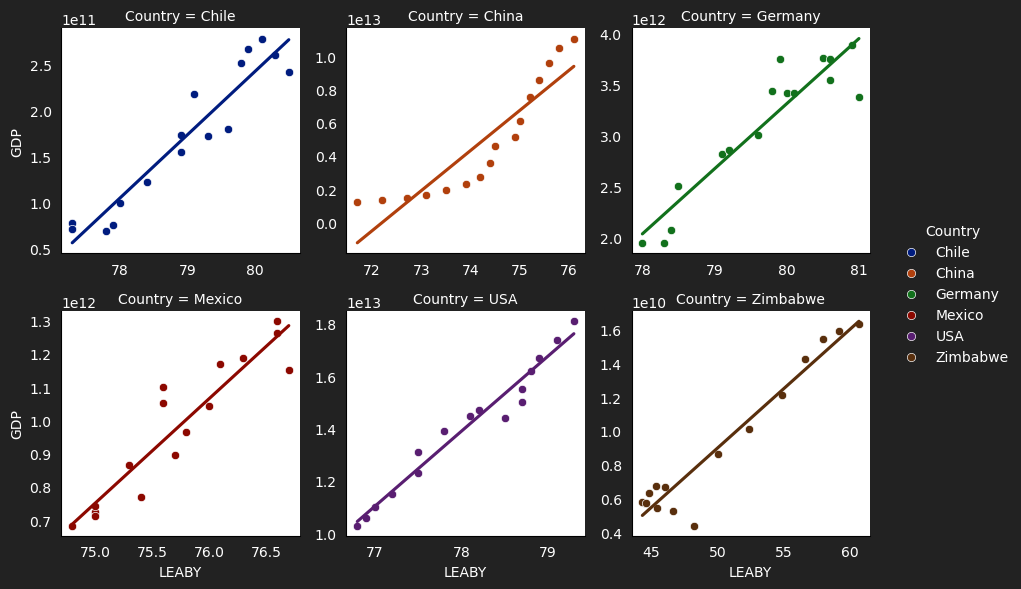

In [17]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LEABY", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));
graph = graph.map(sns.regplot, "LEABY", "GDP", scatter=False, ci=None)

## Correlation and Relation.

**The scatterplots shows that indeed there's a linear relationship between the GDP amount and the LEABY.**
- This can tell us that there might be a correlation between the two variables
- This also indicates that the two variables might have relation.


Correlation matrix:

             GDP     LEABY
GDP    1.000000  0.343207
LEABY  0.343207  1.000000

 p value: 0.0006187129569469811


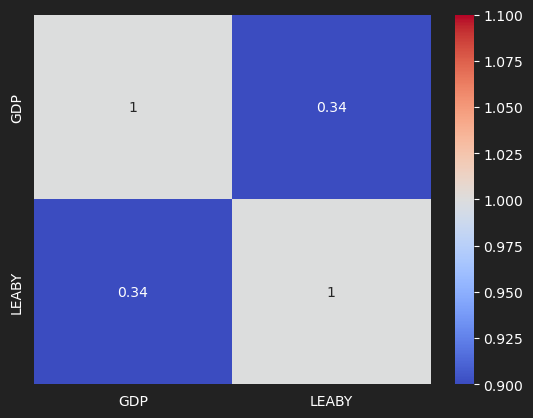

In [13]:
# calculate the correlation
corr_matrix = df[['GDP','LEABY']].corr()
print('Correlation matrix:\n\n',corr_matrix)

#calculate again using pearson's method
corr_gdp_leaby_mean, p = pearsonr(df.LEABY, df.GDP)
#print the p value 
print('\n',f'p value:', p)

# visualize the correlation(if exsist)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=1, vmax=1)
plt.show()


 It appers that as suspected, The GDP has a positive correlation with the Life expectency at birth rate. Meaning that Whenever there is <ins>an increase </ins> in the total GDP in one of the 6 Countries, The LEABY rate would also<ins> increase.</ins>

### [Conclusion]

the project provides a thorough examination of the relationship between GDP and life expectancy at birth across multiple countries. The combination of statistical analyses, visualizations, and correlation testing contributes to a comprehensive understanding of the interplay between economic factors and health outcomes. These findings can be valuable for policymakers, researchers, and stakeholders interested in the socio-economic determinants of life expectancy.